In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
#Lendo o dataset
data = pd.read_excel('jogo.xlsx')

#O código a seguir serve para substituir o os Nan por 0
data_ = data.fillna(0)

In [4]:
df = pd.DataFrame(data_)

In [5]:
#deletar = df.loc[((df.Global_Sales) < 0.001) & ((df.Total_Shipped) <  0.001)]
#a = deletar.index
#dados = df.drop(a)

In [6]:
dados = df
dados["Sales"] = df["Global_Sales"] + df["Total_Shipped"]

In [7]:
df_ = dados
#df_ = dados.loc[((dados.Critic_Score !=0) & ((dados.Sales != 0)))]

In [8]:
xc = df_.loc[:,["Critic_Score"]].values
yc = (df_.loc[:,["Sales"]]*1000).values

In [9]:
xc = pd.DataFrame(xc)
yc = pd.DataFrame(yc)

In [10]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [11]:
regressor.fit(xc, yc) 

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

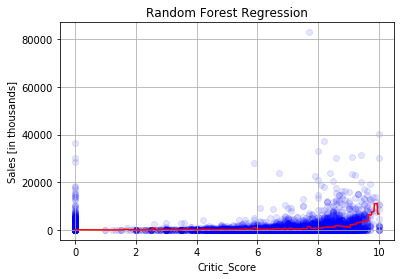

In [12]:
# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(xc.values), max(xc.values), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(xc.values, yc.values, color = 'blue', alpha=0.1)   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color='red')  
plt.title('Random Forest Regression') 
plt.xlabel('Critic_Score') 
plt.ylabel('Sales [in thousands]') 
plt.grid(True)
plt.show()

In [13]:
#nota = int(input("Nota: "))
#d = df_.loc[df_.Critic_Score == nota]
#media = d.Sales.mean()*1000
#minha = regressor.predict([[8,9]])
#diferença = media - minha
#desvio_100 = diferença*100/media
#print("Média de vendas: {0}".format(media))
#print("Valor previsto pela forescast: {0}".format(minha))
#print("Erro em porcentagem: {0}%".format(desvio_100))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xc, yc, test_size=0.33, random_state=RANDOM_SEED)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37380, 1), (37380, 1), (18412, 1), (18412, 1))

In [16]:
regressor.fit(x_train, y_train) 

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
ylinha = regressor.predict(x_test)

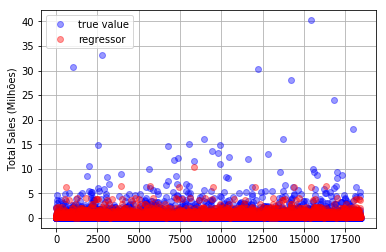

In [18]:
x = np.linspace(0, len(ylinha), len(ylinha))
plt.plot(x,y_test/1000,'bo',alpha=0.4,label="true value")
plt.plot(x,ylinha/1000,'ro',alpha=0.4,label="regressor")
plt.legend()
plt.ylabel("Total Sales (Milhões)")
plt.grid(True)
plt.show()

## Cálculo do erro ##

In [19]:
squarede = r2_score(y_test,ylinha)

In [ ]:
squarede

0.16187585640961766

## Regressão com varias variaveis

In [ ]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [ ]:
data_dum = dummify(df_[["Critic_Score", "User_Score","Vgchartzscore","Genre","Sales","Platform","Publisher","Developer"]],["Genre","Platform","Publisher","Developer"])
len(data_dum.columns)

11234

In [ ]:
lista_nova = list(data_dum.columns)
lista_nova.remove("Sales")
data_trei = data_dum[lista_nova]
sales = data_dum["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_trei,sales, test_size=0.2, random_state=RANDOM_SEED)


In [ ]:
xc_dum = X_train.loc[:,:].values
yc_dum = (Y_train*1000).values

In [ ]:
xc_dum = pd.DataFrame(xc_dum)
yc_dum = pd.DataFrame(yc_dum)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(xc_dum, yc_dum) 

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
regressor.fit(X_train, Y_train) 